# **Preprocessing raw data**
Đầu tiên ta cài đặt các thư viện cần dùng



In [2]:
%pip install hdbscan
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import hdbscan

Kết nối với google drive để lấy được dữ liệu

Tập dữ liệu "online_shoppers_intention.csv" chứa thông tin về hành vi trực tuyến của các khách hàng trên một trang web thương mại điện tử.

- Administrative, Informational, ProductRelated: Số lượng trang mà khách hàng đã xem trong mỗi danh mục liên quan đến hành vi truy cập trước khi thực hiện mua sắm.

- Administrative_Duration, Informational_Duration, ProductRelated_Duration: Tổng thời gian mà khách hàng đã chiếm trong mỗi danh mục.

- BounceRates: Tỷ lệ khách hàng rời bỏ trang web sau khi xem một trang duy nhất.

- ExitRates: Tỷ lệ khách hàng rời khỏi trang web sau khi xem một trang, bất kể là trang nào.

- PageValues: Giá trị trung bình của các trang mà người dùng đã xem trước khi thực hiện một mục tiêu (ví dụ: mua hàng hoặc đăng ký).

- SpecialDay: Khoảng cách thời gian đến ngày lễ đặc biệt gần nhất.

- Month: Tháng của năm.

- OperatingSystems, Browser, Region, TrafficType: Thông tin về hệ điều hành, trình duyệt, khu vực và loại lưu lượng mạng của khách hàng.

- VisitorType: Loại khách hàng, có thể là New_Visitor, Returning_Visitor hoặc Other.

- Weekend: Biến nhị phân chỉ ra xem truy cập có xảy ra vào cuối tuần hay không.

- Revenue: Biến mục tiêu, cho biết xem một giao dịch mua sắm đã được thực hiện hay không (có giá trị True hoặc False).

Tập dữ liệu này có thể được sử dụng để thực hiện các công việc như phân tích hành vi khách hàng, dự đoán khả năng mua hàng, và tối ưu hóa trang web để tăng doanh số bán hàng.

In [4]:
df = pd.read_csv("online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df["Month"].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

In [8]:
df["VisitorType"].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

In [9]:
data = df.copy()

Thực hiện chuyển đổi cột của VisitorType thay vì dữ liệu là chuỗi ta chuyển đổi thành dữ liệu bool, sau đó lại đổi các giá trị của từng cột mới với False là 0 và True là 1

In [10]:
data = pd.get_dummies(data,columns=["VisitorType"])
data["VisitorType_New_Visitor"] = data["VisitorType_New_Visitor"].replace({False: 0, True: 1})
data["VisitorType_Other"] = data["VisitorType_Other"].replace({False: 0, True: 1})
data["VisitorType_Returning_Visitor"] = data["VisitorType_Returning_Visitor"].replace({False: 0, True: 1})
data.head()

C:\Users\bangd\AppData\Local\Temp\ipykernel_16992\203731299.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["VisitorType_New_Visitor"] = data["VisitorType_New_Visitor"].replace({False: 0, True: 1})
C:\Users\bangd\AppData\Local\Temp\ipykernel_16992\203731299.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["VisitorType_Other"] = data["VisitorType_Other"].replace({False: 0, True: 1})
C:\Users\bangd\AppData\Local\Temp\ipykernel_16992\203731299.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and w

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,False,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,False,0,0,1


Thực hiện xử lí dữ liệu ở các cột Month, Weekend, Revenue thành các dữ liệu số

In [11]:
data["Month"] = data["Month"].map({'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12})
data["Weekend"] = data["Weekend"].map({True:1, False:0})
data["Revenue"] = data["Revenue"].map({True:1, False:0})
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,0,1


In [12]:
data["Month"].value_counts()

Month
5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: count, dtype: int64

Cột "Revenue" được bỏ đi từ tập dữ liệu huấn luyện và được sử dụng làm biến mục tiêu (target variable) trong việc huấn luyện mô hình. Lý do chính là để xác định mô hình có thể dự đoán được liệu một khách hàng có thực hiện mua sắm trực tuyến hay không dựa trên các thông tin khác về hành vi truy cập và các yếu tố khác.


In [13]:
X = data.drop("Revenue", axis=1)
Y = data["Revenue"]

In [14]:
X.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [15]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,0,0,1


In [16]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64

# **CLUSTERING DATA**

Sử dụng thuật toán t-SNE (t-distributed Stochastic Neighbor Embedding) để giảm chiều dữ liệu của X_train xuống còn 2 chiều, từ đó tạo ra một biểu đồ phân tán có thể được trực quan hóa.

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)


In [18]:
X_tsne.shape

(12330, 2)

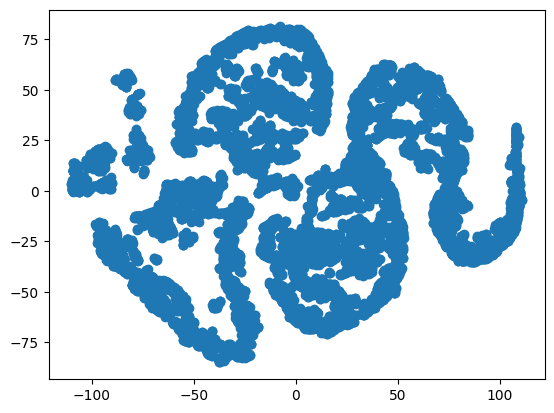

In [56]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])


Áp dụng thuật toán DBSCAN (Density-Based Spatial Clustering of Applications with Noise) để phân cụm dữ liệu X_train_tsne đã được giảm chiều với t-SNE thành 2 chiều.

- Tạo ra một loạt các mô hình DBSCAN với các giá trị khác nhau của tham số epsilon (eps). Cụ thể, dbscan_eps_grid là một danh sách các đối tượng DBSCAN được tạo ra với eps tăng dần từ 1 đến 9.

- Định nghĩa hàm plot_dbscan để trực quan hóa kết quả của các mô hình DBSCAN. Hàm này sẽ vẽ các điểm dữ liệu trên mặt phẳng 2 chiều, màu sắc biểu thị cụm mà mỗi điểm thuộc về, và kí hiệu các điểm là các điểm lõi, ngoại lai hoặc không phải là điểm lõi.

- Trong vòng lặp, mỗi mô hình DBSCAN từ dbscan_eps_grid sẽ được truyền vào hàm plot_dbscan để vẽ biểu đồ tương ứng.

- Cuối cùng, các biểu đồ phân cụm DBSCAN tương ứng với các giá trị epsilon khác nhau sẽ được hiển thị trên một lưới dạng subplot.

In [20]:
from sklearn.cluster import DBSCAN

In [21]:
def plot_dbscan(dbscan, X, size, show_xlabels=False, show_ylabels=False):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='.', s=size, cmap="rainbow")
    #plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="black", marker="x", s=100)
    # plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

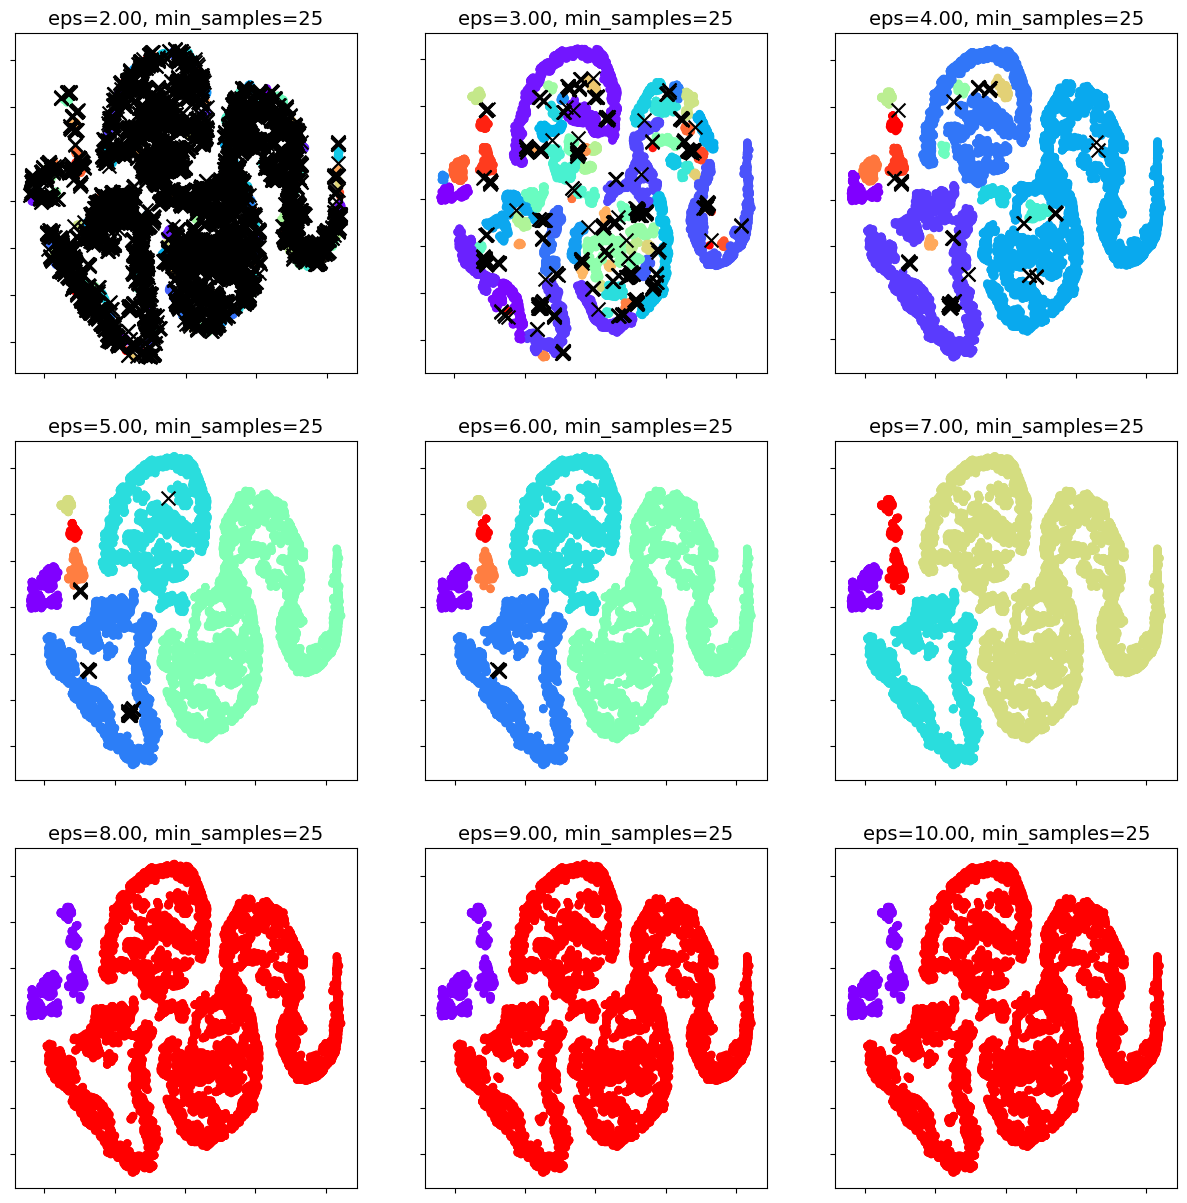

In [59]:
dbscan_eps_grid = [DBSCAN(eps=eps, min_samples=25).fit(X_tsne) for eps in range(2, 11)]

plt.figure(figsize=(15,15))
for idx, dbscan in enumerate(dbscan_eps_grid):
  plt.subplot(330 + idx + 1)
  plot_dbscan(dbscan, X_tsne, size=100)
plt.show()

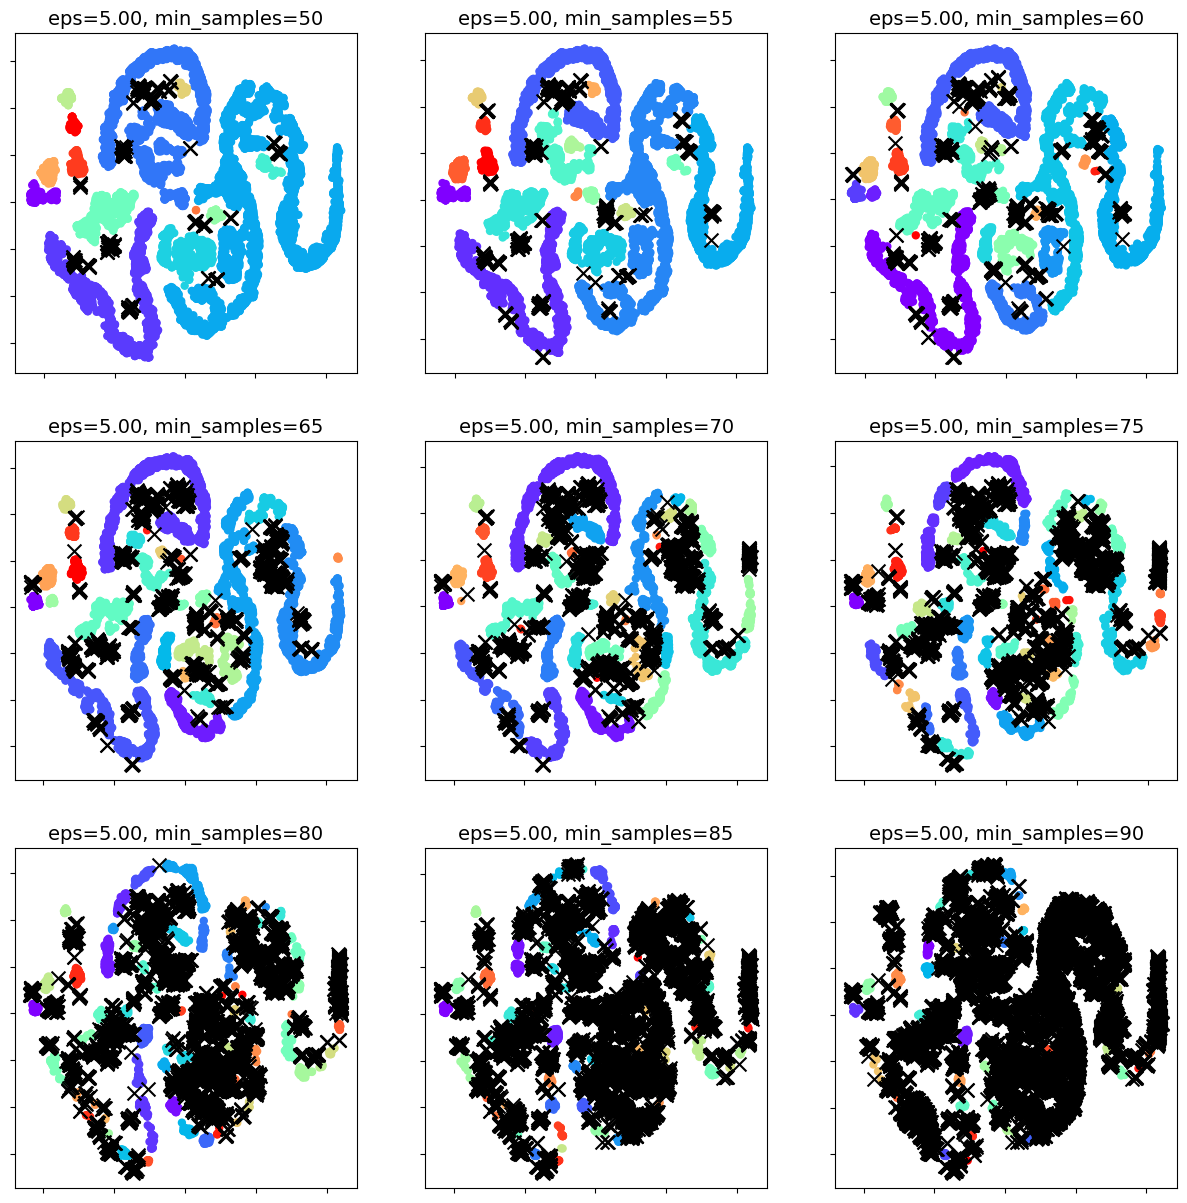

In [70]:
dbscan_min_samples_grid = [DBSCAN(eps=5, min_samples=min_samples).fit(X_tsne) for min_samples in range(5, 50, 5)]
plt.figure(figsize=(15,15))
for idx, dbscan in enumerate(dbscan_min_samples_grid):
  plt.subplot(330 + idx + 1)
  plot_dbscan(dbscan, X_tsne, size=100)
plt.show()

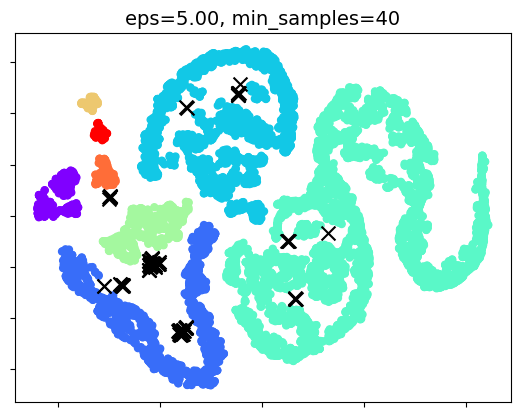

In [67]:
best_fit_dbscan = DBSCAN(eps=5, min_samples=40).fit(X_tsne)
plot_dbscan(best_fit_dbscan, X_tsne, size=100)
plt.show()

 Sử dụng thư viện scikit-learn để thực hiện phân cụm dữ liệu bằng thuật toán KMeans

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit_predict(X_tsne)

array([4, 7, 4, ..., 1, 2, 7])

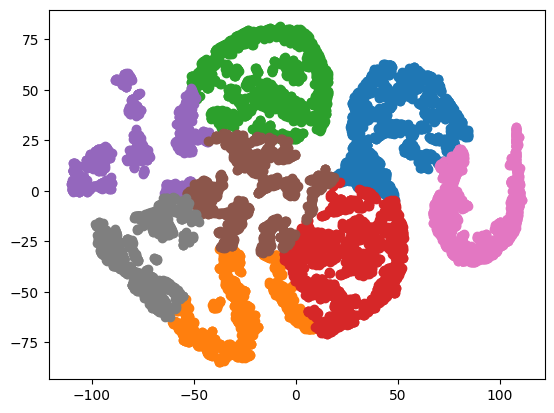

In [71]:
for i in range(8):
  plt.scatter(X_tsne[kmeans.labels_ == i, 0], X_tsne[kmeans.labels_ == i, 1])

Sử dụng thuật toán HDBSCAN để phân cụm dữ liệu X_train_tsne đã được giảm chiều với t-SNE thành 2 chiều, với các giá trị khác nhau của tham số min_samples trong khoảng từ 18 đến 26.

Cụ thể, mục đích của từng phần trong đoạn mã như sau:

- hdbscan_clusters: Tạo ra một danh sách các mô hình HDBSCAN với các giá trị khác nhau của tham số min_samples. Vòng lặp for duyệt qua các giá trị từ 18 đến 26 và tạo một mô hình HDBSCAN với mỗi giá trị min_samples.

- plot_hdbscan: Định nghĩa hàm để trực quan hóa kết quả của mô hình HDBSCAN. Hàm này vẽ biểu đồ các điểm dữ liệu trên mặt phẳng 2 chiều, màu sắc biểu thị cụm mà mỗi điểm thuộc về và các điểm ngoại lai. Ngoài ra, hàm cũng vẽ tất cả các điểm dữ liệu với màu mặc định và vẽ tiêu đề của biểu đồ với giá trị min_samples tương ứng.

- Trong vòng lặp for, mỗi mô hình HDBSCAN từ hdbscan_clusters được truyền vào hàm plot_hdbscan để vẽ biểu đồ phân cụm tương ứng.

- Cuối cùng, các biểu đồ phân cụm HDBSCAN tương ứng với các giá trị min_samples khác nhau sẽ được hiển thị trên một lưới dạng subplot. Điều này giúp so sánh hiệu suất của các mô hình HDBSCAN với các cấu hình tham số khác nhau.

In [81]:
def plot_hdbscan(hdbscan_clusterer, X, size, show_xlabels=False, show_ylabels=False):
    core_mask = hdbscan_clusterer.labels_ != -1
    anomalies_mask = hdbscan_clusterer.labels_ == -1

    cores = X[core_mask]
    anomalies = X[anomalies_mask]

    plt.scatter(cores[:, 0], cores[:, 1], c=hdbscan_clusterer.labels_[core_mask], marker='.', s=size, cmap="rainbow")
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="black", marker="x", s=100)
    # plt.scatter(X[:, 0], X[:, 1], c=hdbscan_model.labels_, marker=".", alpha=0.5)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("min_samples={} min_cluster_size={}".format(hdbscan_clusterer.min_samples, hdbscan_clusterer.min_cluster_size), fontsize=14)


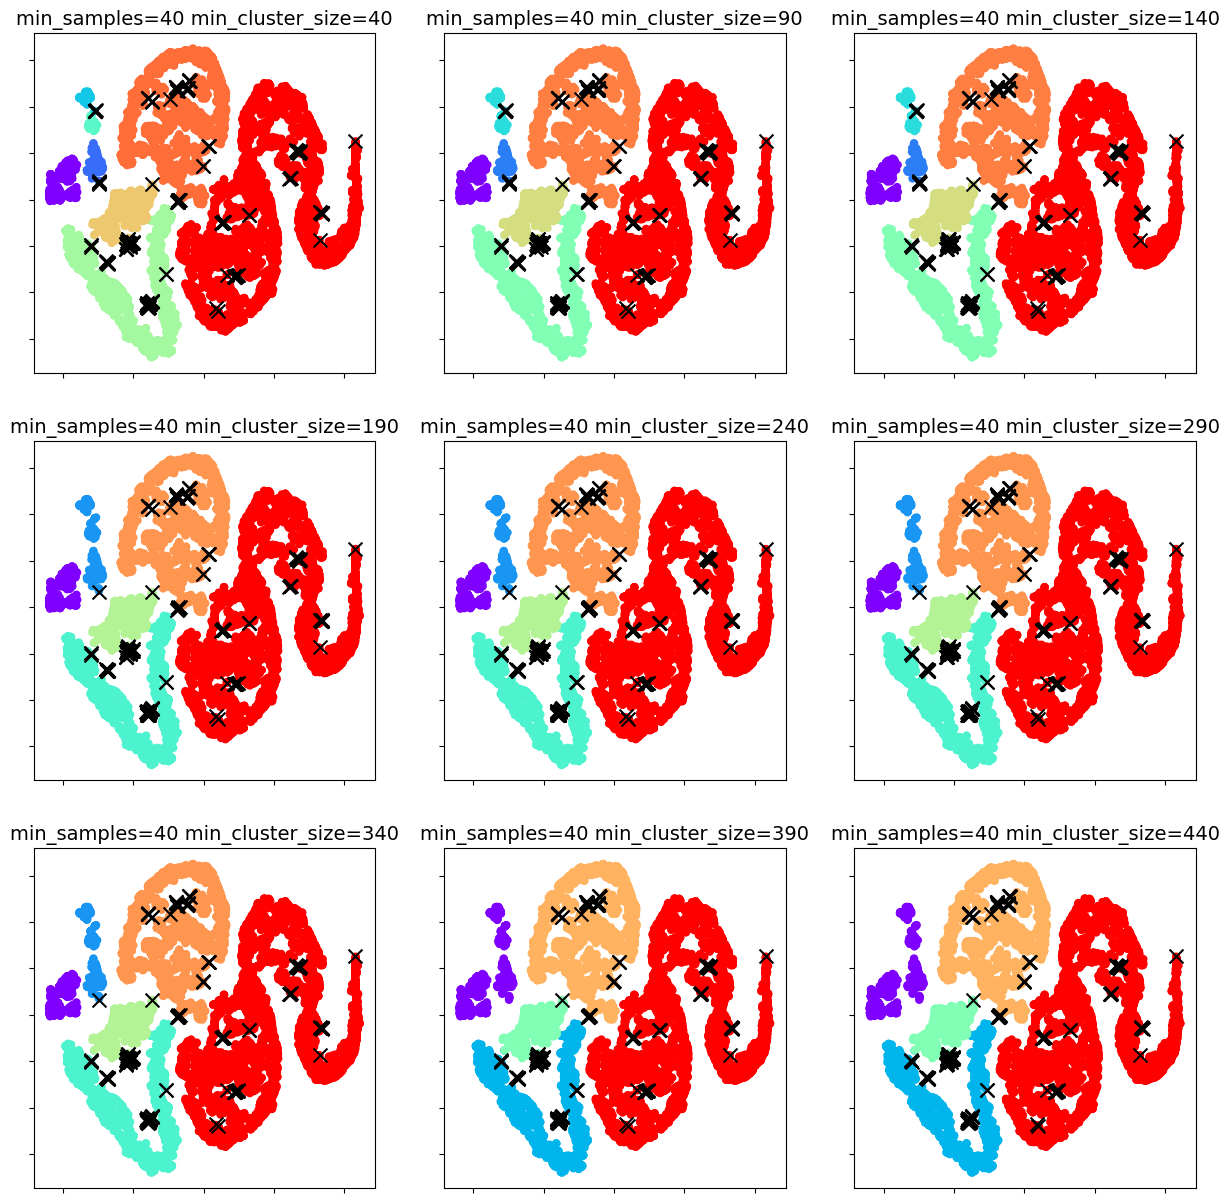

In [82]:
hdbscan_clusters = [hdbscan.HDBSCAN(min_samples=40, min_cluster_size=min_cluster_sizes).fit(X_tsne) 
                    for min_cluster_sizes in range(40, 490, 50)]
plt.figure(figsize=(15, 15))
for idx, hdbscan_clusterer in enumerate(hdbscan_clusters):
    plt.subplot(330 + idx + 1)
    plot_hdbscan(hdbscan_clusterer, X_tsne, size=100)
plt.show()

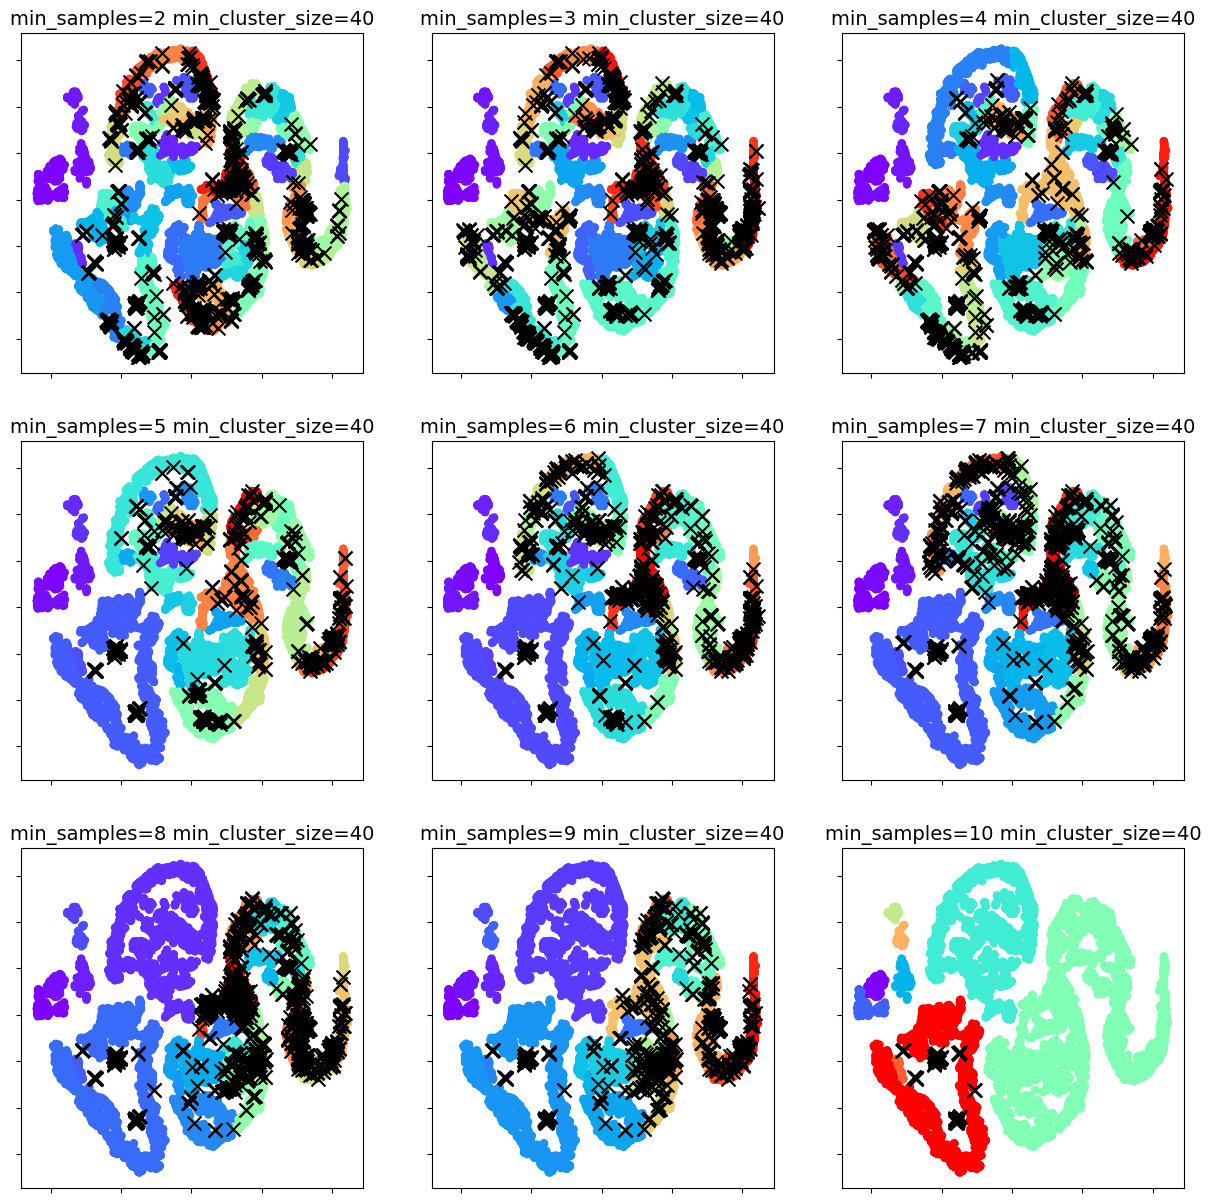

In [109]:
hdbscan_clusters = [hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=40).fit(X_tsne) 
                    for min_samples in range(2, 11)]
plt.figure(figsize=(15, 15))
for idx, hdbscan_clusterer in enumerate(hdbscan_clusters):
    plt.subplot(330 + idx + 1)
    plot_hdbscan(hdbscan_clusterer, X_tsne, size=100)
plt.show()

In [102]:
unique_values = np.unique(hdbscan_clusters[6].labels_)
unique_values

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

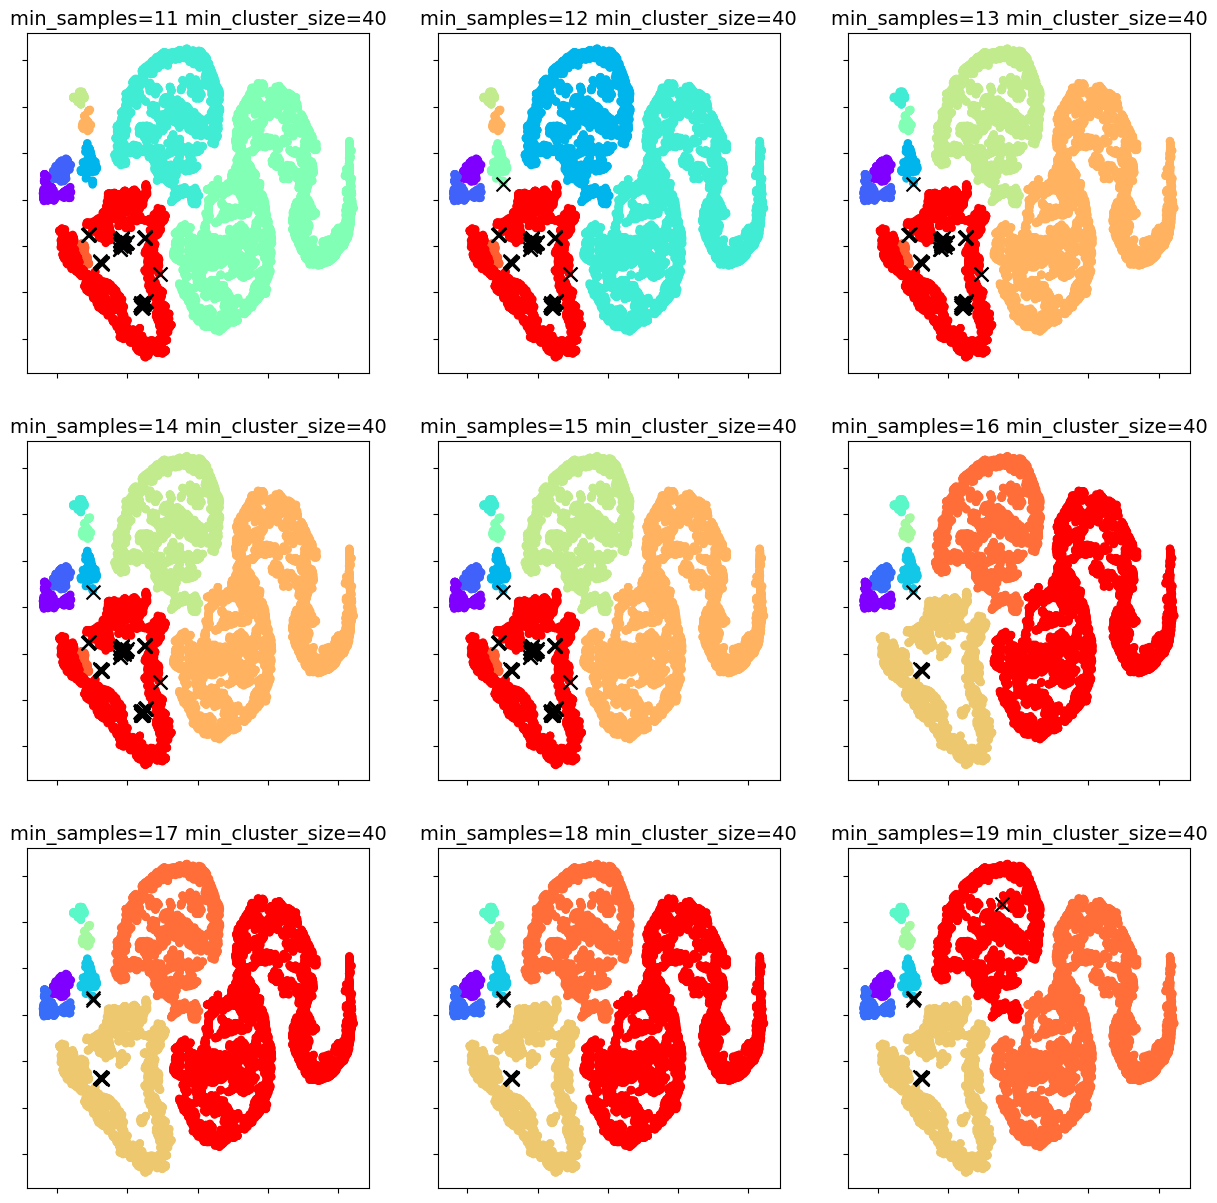

In [110]:
hdbscan_clusters = [hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=40).fit(X_tsne) 
                    for min_samples in range(11, 20)]
plt.figure(figsize=(15, 15))
for idx, hdbscan_clusterer in enumerate(hdbscan_clusters):
    plt.subplot(330 + idx + 1)
    plot_hdbscan(hdbscan_clusterer, X_tsne, size=100)
plt.show()

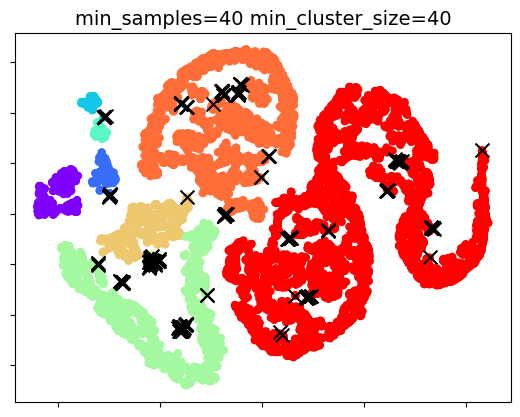

In [107]:
best_fit_hdbscan = hdbscan.HDBSCAN(min_samples=40, min_cluster_size=40).fit(X_tsne)
plot_hdbscan(best_fit_hdbscan, X_tsne, size=100)
plt.show()

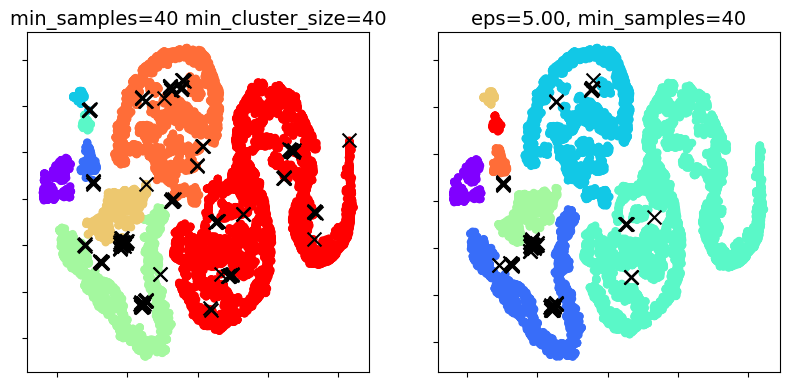

In [91]:
plt.figure(figsize=(15, 15))
plt.subplot(330 + 1)
plot_hdbscan(best_fit_hdbscan, X_tsne, size=100)
plt.subplot(330 + 2)
plot_dbscan(best_fit_dbscan, X_tsne, size=100)


In [84]:
# Lấy ra các nhãn cụm duy nhất
unique_values = np.unique(best_fit_hdbscan.labels_)
unique_values

array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [85]:
data.loc[:, "ClusterID"] = best_fit_hdbscan.labels_
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,ClusterID
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,...,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,...,2.124006,2.357097,3.147364,4.069586,0.232603,0.154745,0.137388,0.006894,0.855718,5.700324
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,...,0.911325,1.717277,2.401591,4.025169,0.422509,0.361676,0.344271,0.082745,0.351390,1.864579
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,...,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,...,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,...,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,...,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [94]:
cluster_info_list = []
total_revenue = len(data[data["Revenue"]==1])
for cluster_id in range(0, 8):
  cluster_info = data[data["ClusterID"]==cluster_id].mean()
  cluster_info["ClusterSize"] = len(data[data["ClusterID"]==cluster_id])
  cluster_info["TotalRevenue"] = len(data[(data["ClusterID"]==cluster_id) & (data["Revenue"]==1)]) / total_revenue
  cluster_info_list.append(cluster_info)

In [95]:
pd.concat(cluster_info_list, axis=1)

,0,1,2,3,4,5,6,7
Administrative,0.041558,0.005464,0.000000,0.038462,0.073361,3.184767,1.870384,3.434608
Administrative_Duration,0.028571,0.000000,0.000000,0.000000,0.383585,71.152169,59.299822,127.673225
Informational,0.005195,0.021858,0.000000,0.051282,0.024454,0.118477,0.368608,0.791080
Informational_Duration,0.000000,0.125683,0.000000,0.000000,0.120630,1.688634,27.427059,53.367578
ProductRelated,1.348052,1.300546,2.181818,1.243590,6.410510,6.877292,15.776989,54.323608
ProductRelated_Duration,0.027706,0.087432,0.412879,0.006410,107.531524,108.729091,403.113683,2199.965932
BounceRates,0.193169,0.189982,0.182438,0.196154,0.023919,0.008310,0.010101,0.008347
ExitRates,0.197615,0.196357,0.192130,0.197650,0.067010,0.032354,0.030239,0.023925
PageValues,0.000000,0.000000,0.000000,0.000000,0.127285,1.661818,5.992999,8.615882
SpecialDay,0.096623,0.000000,0.143182,0.000000,0.095630,0.031876,0.059588,0.054158


**Giải thích kết quả phân cụm:**

- Cụm 0: Page value cao nhất nên ít lượt xem trang nhất trước khi thực hiện giao dịch,
         VisitorType_New_Visitor cao nhất nên nhóm này chủ yếu là khách hàng mới.

- Cụm 1 đến cụm 5: Bouncerates cao nhất nên có xu hướng rời khỏi trang web sau xem một trang,
                   Đóng góp doanh thu gần như bằng 0.

- Cụm 6: Có số lượng khách hàng lớn thứ nhì, tuy nhiên tỷ lệ doanh thu rất thấp.

- Cụm 7: ProductRelated_Duration cao nhất, chủ yếu là khách truy cập quay lại. Chiếm phần lớn tổng doanh thu.